In [10]:
'''General Libraries'''
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 500)

'''Statistic'''
import scipy
from scipy import stats
from scipy.stats import norm
import datetime

'''Scikit Learn'''
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

from sklearn.cluster import KMeans, OPTICS 
from sklearn.metrics import silhouette_samples, silhouette_score

'''Ploting Libraries'''
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "iframe" 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style 
style.use("fivethirtyeight") 

import seaborn as sns
sns.set_palette('RdBu')

import warnings
warnings.filterwarnings("ignore")

import yellowbrick

'''Miscellaneous'''

'''Seeds'''
import random
random.seed(10)
np.random.seed(11)

In [6]:
df1 = pd.read_csv('data_clean_noOutliers.csv')
df2 = pd.read_csv('clusterLabel_kmeans_6.csv')

df = pd.concat([df1, df2], axis=1)

In [7]:
df

,name,5k,10k,20k,half,25k,30k,35k,40k,official,pace,rank_overall,rank_in_gender_only,rank_in_division,age,gender,country,state,city,bib,cluster
0,"Yamamoto, Hiroyuki",8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,85.25,3.27,8,8,8,47,M,JPN,others,Fukuoka,W1,4
1,"Jeptoo, Rita",16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,138.95,5.30,21,1,1,33,F,KEN,others,Eldoret,F1,5
2,"Van Dyk, Ernst F.",7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,80.60,3.08,1,1,1,41,M,RSA,others,Paarl,W2,4
3,"Dibaba, Mare",16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,140.58,5.37,27,3,3,24,F,ETH,others,Shoa,F2,5
4,"Hokinoue, Kota",8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,81.23,3.10,2,2,2,40,M,JPN,others,Nogata Fukuoka,W3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31629,"Anderson, Steve K.",26.13,50.72,99.55,104.78,124.02,148.65,174.90,200.22,211.75,8.08,9849,7500,3414,32,M,USA,CA,Larkspur,35908,3
31630,"McCarthy, Michael P.",31.07,61.28,128.37,135.85,165.02,203.43,244.70,285.47,302.52,11.55,27456,15459,5212,34,M,USA,MA,Norwell,35909,3
31631,"Brimmer, Delia C.",28.18,59.00,123.33,130.57,157.02,192.65,229.62,266.30,282.00,10.77,25092,10788,5231,21,F,USA,CT,West Simsbury,35910,1
31632,"Morganthal, Amy",30.98,63.75,129.90,137.03,167.82,207.52,247.18,285.87,302.73,11.55,27476,12009,5800,38,F,USA,MA,North Andover,35911,1


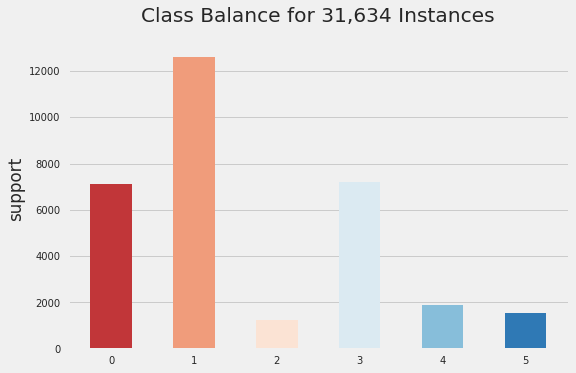

In [18]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=[0, 1, 2, 3, 4, 5])
visualizer.fit(df['cluster'])
visualizer.show()   

In [33]:
# Split df to smaller dataframes based on clusters
cluster_data = {}

for i in range(0, 6):
    index = str(i)
    cluster_data['cluster_'+index] = df[df.cluster==i]

print(list(cluster_data.keys()))

['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5']


# 1. Gender 

In [97]:
# Gender of clusters

## The data
cluster_gender = {}
for i in range(0, 6):
    index = str(i)
    cluster_gender['cluster_'+index] = cluster_data['cluster_'+index].gender.value_counts()

## To DataFrame
cluster_gender = pd.DataFrame(cluster_gender).T
cluster_gender.fillna(0, inplace=True)
cluster_gender

,F,M
cluster_0,0.0,7134.0
cluster_1,12596.0,0.0
cluster_2,0.0,1235.0
cluster_3,0.0,7199.0
cluster_4,0.0,1905.0
cluster_5,1565.0,0.0


In [120]:
cluster_gender.iloc[0, :]

F       0.0
M    7134.0
Name: cluster_0, dtype: float64

In [140]:
# Gender of clusters
fig = go.Figure()

x = []
for i in range(6):
    x.append('Cluster '+str(i))

fig.add_bar(name='Female',x=x, y=cluster_gender.iloc[:, 0], marker_color='red')
fig.add_bar(name='Male'  ,x=x, y=cluster_gender.iloc[:, 1], marker_color='green')

fig.update_layout(barmode='group',
                  title='Clusters - Gender')
fig.show()

# Age Division

In [16]:
cluster_age = {'cluster 0' : cluster_0.age_division.value_counts(),
               'cluster 1' : cluster_1.age_division.value_counts(),
            }


cluster_age = pd.DataFrame(data=cluster_age)

cluster_age.fillna(0, inplace=True)

In [17]:
cluster_age

,cluster 0,cluster 1
0.0,4831,3795
0.1,2069,2109
0.2,2304,2618
0.3,2270,2905
0.4,1463,2458
0.5,751,1768
0.6,337,1097
0.7,117,529
0.8,18,157
0.9,3,41


In [18]:
#fig = make_subplots(rows=1, cols=3)

fig = go.Figure()

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]

trace0 = go.Bar(x=x, y=cluster_age['cluster 0'])
trace1 = go.Bar(x=x, y=cluster_age['cluster 1'])

fig.add_trace(trace0)
fig.add_trace(trace1)

fig.update_layout(barmode='group',
                  title='Clusters - Age Division')

fig.show()

# Test

In [9]:
cluster_1.groupby('age_division').count()

,Unnamed: 0,5k,10k,20k,half,25k,30k,35k,40k,official,pace,5k_avgSpeed,10k_avgSpeed,20k_avgSpeed,25k_avgSpeed,30k_avgSpeed,35k_avgSpeed,40k_avgSpeed,rank_overall,rank_in_gender_only,rank_in_division,age,gender,country,state,city,cluster
age_division,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795
0.1,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109
0.2,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618
0.3,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905
0.4,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458
0.5,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768
0.6,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097
0.7,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529
0.8,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157


In [48]:
age_cluster_0 = cluster_0.groupby('age_division').count().cluster
px.bar(age_cluster_0)



KeyError: 'age_division'

In [11]:
age_cluster_1 = cluster_1.groupby('age_division').count().cluster
px.bar(age_cluster_1)

In [12]:
cluster_1.groupby('age_division').count().cluster

age_division
0.0    3795
0.1    2109
0.2    2618
0.3    2905
0.4    2458
0.5    1768
0.6    1097
0.7     529
0.8     157
0.9      41
1.0       7
Name: cluster, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

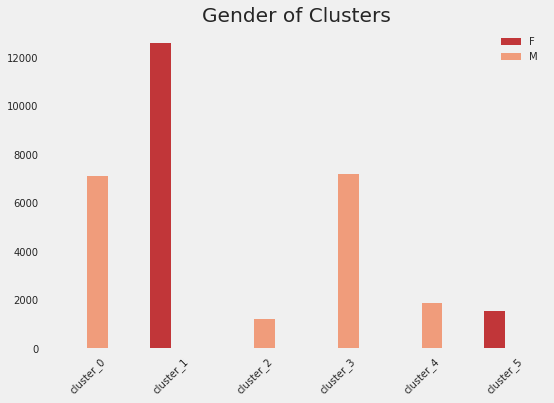

In [111]:
cluster_gender.plot(kind='bar', 
                    title='Gender of Clusters',
                    grid=False)
plt.xticks(rotation=45)